In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = os.path.join(os.path.dirname('.'), 'data')
sku = pd.read_csv(os.path.join(path, 'sku_dict.csv'), parse_dates=['creation_date', 'expiration_date'])
sku


,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01
...,...,...,...,...,...,...,...,...,...
9995,90248,B0,B01,B0100,B010000,AWD3XQ,4P277OU8,2019-10-24,2200-01-01
9996,89418,SI,SI1,SI100,SI10000,2CI2A8,8FYENEWM,2019-07-28,2200-01-01
9997,54920,GY,GY1,GY102,GY10200,4HJSP5,3P2I0S6S,2018-01-22,2200-01-01
9998,41483,70,701,70100,7010003,2CI2A8,MMC2P4Y3,2019-03-23,2019-06-15


In [3]:
first_gr = pd.read_csv(os.path.join(path, 'first_group_sku.csv'), parse_dates=['dates'])
first_gr

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,32950,422.975,3
1,2018-04-24,32950,429.275,3
2,2018-04-27,32950,435.100,3
3,2018-04-30,32950,NaN,1
4,2018-05-03,32950,440.950,2
...,...,...,...,...
240,2019-11-25,78833,NaN,1
241,2019-11-27,78833,301.560,2
242,2019-11-28,78833,301.305,2
243,2019-11-29,78833,301.920,1


In [4]:
first_gr.pivot_table(index='SKU', values='price_per_sku', aggfunc=['min', 'max'])

,min,max
,price_per_sku,price_per_sku
SKU,,
32950,422.975,486.325
78833,295.830,324.450


In [5]:
grps = ['first_group_sku', 'second_group_sku', 'third_group_sku']
uvb = pd.DataFrame(columns=['vendor', 'brand_code', 'file'])
mm = pd.DataFrame()
for gr in grps:
    df = pd.read_csv(os.path.join(path, gr + '.csv'), parse_dates=['dates'])
    temp_mm = df.pivot_table(index='SKU', values='price_per_sku', aggfunc=['min', 'max'])
    mm = pd.concat([mm, temp_mm])
    sku_merge = sku.merge(df.rename(dict(SKU='sku_id'), axis=1), how='inner', on='sku_id')
    temp = sku_merge.groupby(['vendor'], as_index=False)['brand_code'].count()
    temp['file'] = gr
    uvb = pd.concat([uvb, temp], ignore_index=True)
uvb.rename(columns={'vendor': 'vendor_unique_number', 'brand_code': 'brand_unique_number'}, inplace=True)
# uvb.to_csv(os.path.join(path, 'unique_vendor_brand.csv'), index=False)
mm = mm.reset_index()
mm.columns = [f'{s[0]}_price' if s[0] != 'SKU' else s[0] for s in mm.columns]

In [6]:
uvb

,vendor_unique_number,brand_unique_number,file
0,AO59EQ,149,first_group_sku
1,UH2WWF,96,first_group_sku
2,4HJSP5,917,second_group_sku
3,4O4WSH,565,second_group_sku
4,AWD3XQ,491,second_group_sku
5,BLW9FG,91,second_group_sku
6,FI3ASO,462,second_group_sku
7,LDLJFP,56,second_group_sku
8,SHL570,525,second_group_sku
9,TJYT3A,102,second_group_sku


In [7]:
mm

,SKU,min_price,max_price
0,32950,422.9750,486.325
1,78833,295.8300,324.450
2,10334,79.1504,102.781
3,17812,61.0640,78.192
4,36096,120.6720,135.312
5,38767,62.9118,75.852
6,43678,116.5312,151.474
7,57561,77.9744,101.829
8,64619,142.8534,153.704
9,68211,147.7683,166.056


In [8]:
### 2 
# Постройте зависимость цены (price_per_sku) от времени (dates) для каждого SKU. 
# Результатом должен быть график с соответствующими данными по осям по SKU.
fg = first_gr.copy()
# fg['dates'] = pd.to_datetime(fg.dates)
# fg.set_index('dates', inplace=True)

In [9]:
import matplotlib as mpl

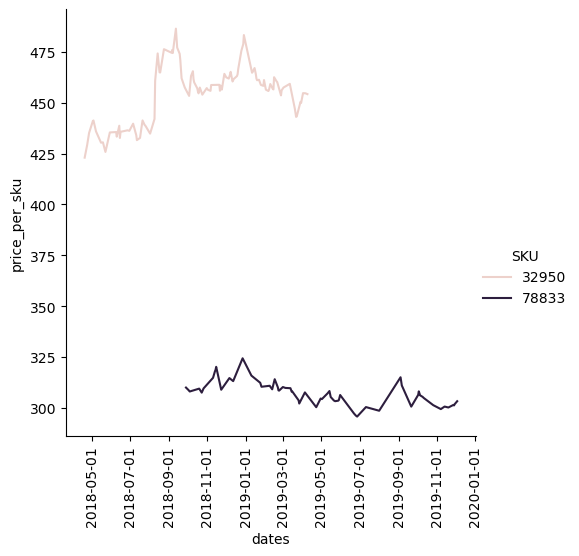

In [10]:
mpl.rcParams['figure.figsize'] = (10, 5)
g = sns.relplot(data=fg, x='dates', y='price_per_sku', hue='SKU', kind='line')
g.set_xticklabels(rotation=90);

In [11]:
fg.SKU.value_counts(dropna=False)

SKU
32950    149
78833     96
Name: count, dtype: int64

In [12]:
# Посчитайте количество пропусков в столбце цен (price_per_sku) для каждого SKU.
# Сохраните результат в файл first_sku_price_missings.csv с колонками 'SKU', 'nulls_count'.
fg.SKU.value_counts() - fg.groupby('SKU')['price_per_sku'].count()

SKU
32950    44
78833    32
dtype: int64

In [15]:
fg = first_gr.copy()
fg['price_impute'] = fg.price_per_sku.interpolate(method='linear')

In [16]:
fg

,dates,SKU,price_per_sku,num_purchases,price_impute
0,2018-04-20,32950,422.975,3,422.9750
1,2018-04-24,32950,429.275,3,429.2750
2,2018-04-27,32950,435.100,3,435.1000
3,2018-04-30,32950,NaN,1,438.0250
4,2018-05-03,32950,440.950,2,440.9500
...,...,...,...,...,...
240,2019-11-25,78833,NaN,1,300.9225
241,2019-11-27,78833,301.560,2,301.5600
242,2019-11-28,78833,301.305,2,301.3050
243,2019-11-29,78833,301.920,1,301.9200


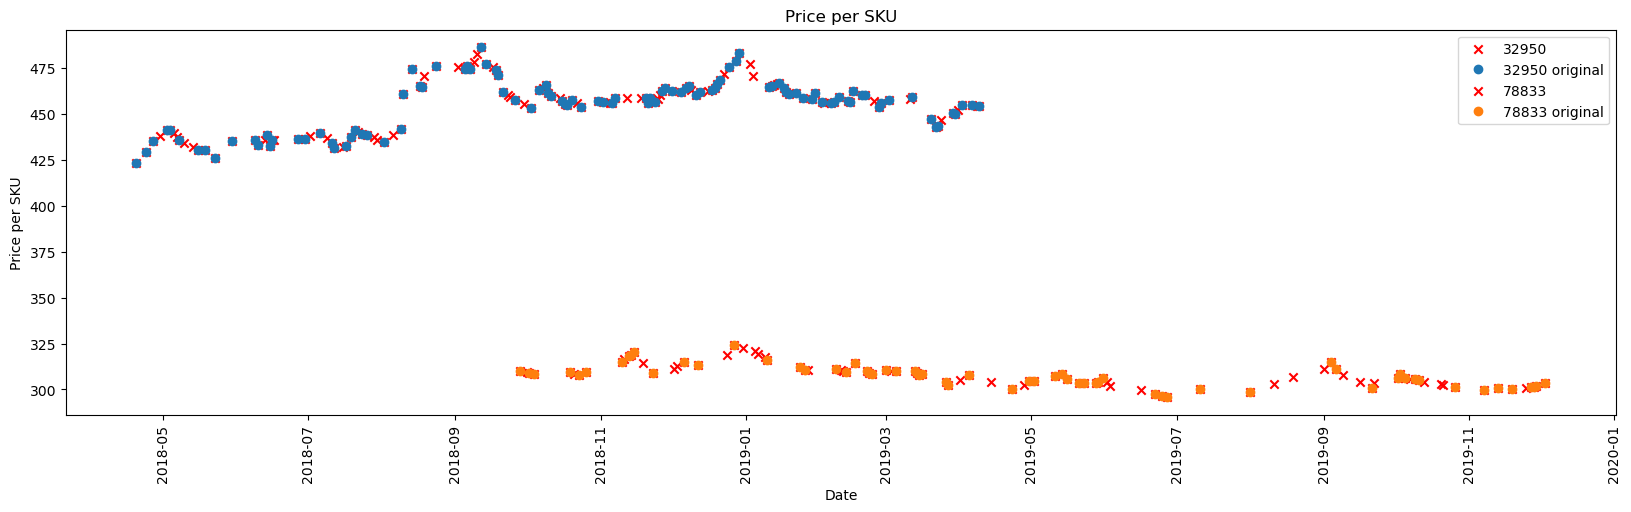

In [26]:
fig, axs = plt.subplots(figsize=(20,5))
for sku_id, group in fg.groupby('SKU'):
    axs.scatter(group.dates, group.price_impute, label=sku_id, marker='x', c='red')
    axs.plot(group.dates, group.price_per_sku, 'o', label=f'{sku_id} original')
axs.legend()
axs.set_title('Price per SKU')
axs.set_xlabel('Date')
axs.set_ylabel('Price per SKU')
plt.xticks(rotation=90)
plt.show()

In [34]:
fg['price_pct_change'] = fg.groupby('SKU')['price_impute'].pct_change() * 100
fg['quantity_pct_change'] = fg.groupby('SKU')['num_purchases'].pct_change() * 100
fg['elasticity'] = fg['price_pct_change'] / fg['quantity_pct_change']
fg['elasticity'] = fg['elasticity'].replace([np.inf, -np.inf], np.nan)

<Axes: xlabel='num_purchases', ylabel='price_impute'>

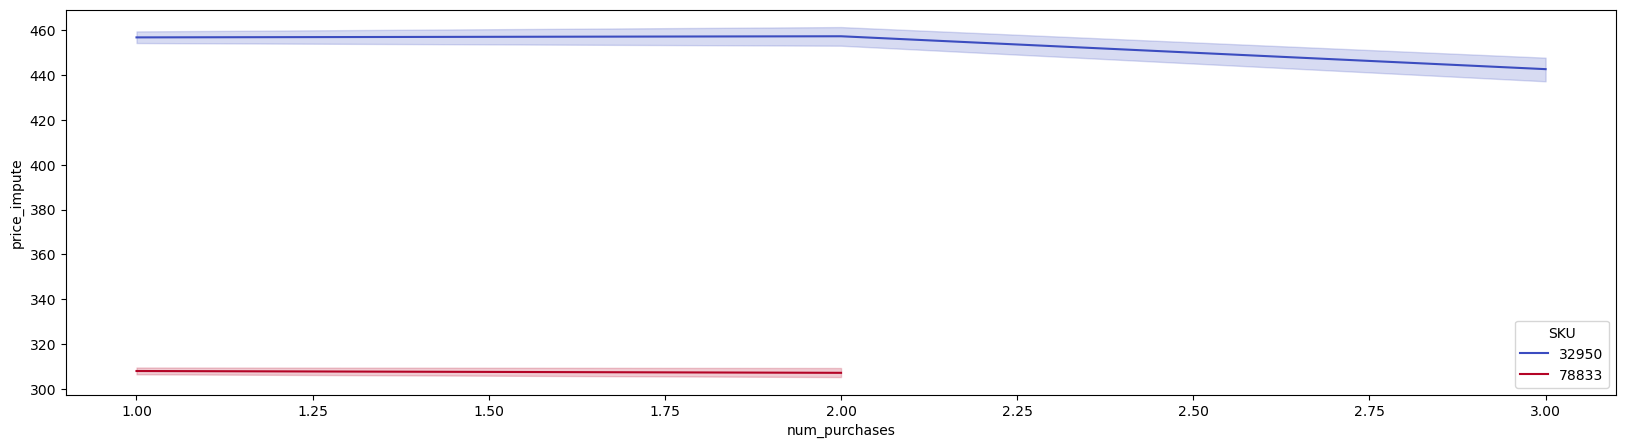

In [ ]:
fig, axs = plt.subplots(figsize=(20,5))
sns.lineplot(x='num_purchases', y='price_impute', data=fg, hue='SKU', palette='coolwarm')

### На данном шаге используйте данные для второй группы (second_group_sku).  
Данные по промоакциям находятся в файле promo_1510002.csv. Ключ для объединения — SKU.

In [4]:
promo = pd.read_csv(os.path.join(path, 'promo_1510002.csv'))
promo.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [5]:
second_df = pd.read_csv(os.path.join(path, 'second_group_sku.csv'), parse_dates=['dates'])
second_df['year'] = second_df.dates.dt.year
# second_df['month'] = second_df.dates.dt.month
# second_df['day'] = second_df.dates.dt.day
second_df['week_num'] = second_df.dates.dt.strftime('%W').astype(int) + 1
second_df

,dates,SKU,price_per_sku,num_purchases,year,week_num
0,2018-04-19,10334,92.890,10,2018,17
1,2018-04-20,10334,92.890,11,2018,17
2,2018-04-21,10334,92.890,10,2018,17
3,2018-04-22,10334,92.890,12,2018,17
4,2018-04-23,10334,92.456,10,2018,18
...,...,...,...,...,...,...
3744,2018-12-08,98255,67.032,7,2018,50
3745,2018-12-09,98255,67.032,9,2018,50
3746,2018-12-10,98255,67.116,7,2018,51
3747,2018-12-13,98255,67.116,9,2018,51


In [6]:
second_df.dates.dt.strftime('%W').astype(int) + 1

0       17
1       17
2       17
3       17
4       18
        ..
3744    50
3745    50
3746    51
3747    51
3748    51
Name: dates, Length: 3749, dtype: int64

1. Постройте график зависимости цены (price_per_sku) от времени (dates) для каждого SKU.

In [7]:
second_promo = second_df.merge(promo, how='left', on=['SKU', 'year', 'week_num']); second_promo

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount
0,2018-04-19,10334,92.890,10,2018,17,NaN
1,2018-04-20,10334,92.890,11,2018,17,NaN
2,2018-04-21,10334,92.890,10,2018,17,NaN
3,2018-04-22,10334,92.890,12,2018,17,NaN
4,2018-04-23,10334,92.456,10,2018,18,NaN
...,...,...,...,...,...,...,...
3744,2018-12-08,98255,67.032,7,2018,50,NaN
3745,2018-12-09,98255,67.032,9,2018,50,NaN
3746,2018-12-10,98255,67.116,7,2018,51,NaN
3747,2018-12-13,98255,67.116,9,2018,51,NaN


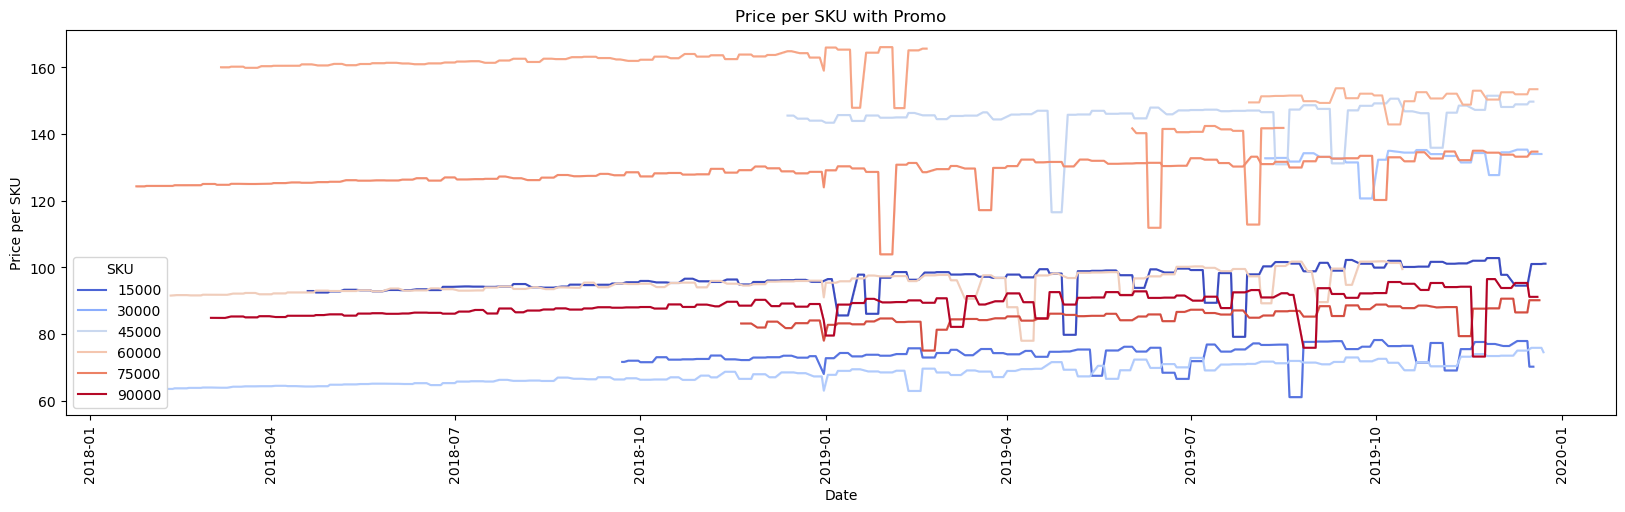

In [71]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='dates', y='price_per_sku', data=second_promo, hue='SKU', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price per SKU with Promo')
plt.xlabel('Date')
plt.ylabel('Price per SKU')
plt.show()

2. Для каждого SKU в файле promo_1510002.csv посчитайте количество записей (строк) с промоакциями.
Результат сохраните в файл second_sku_promo_count.csv со столбцами 'SKU', 'promo_count'.

In [8]:
promo.groupby(by='SKU', as_index=False)['discount'].count().rename(columns={'discount': 'promo_count'}).sort_values(by='promo_count', ascending=False)\
.to_csv(os.path.join(path, 'second_sku_promo_count.csv'), index=False)

3. Посчитайте среднее количество продаж в период с промоакциями и в период без них. <br>
Результат сохраните в файл second_sku_sales_comparison.csv со столбцами 'SKU', 'mean_num_purchases_promo', 'mean_num_purchases_wo_promo'.

In [9]:
purchases_mean = second_promo.groupby(['year', 'SKU'])['num_purchases'].mean().reset_index()

In [10]:
mean_num_pur = purchases_mean.pivot(index='SKU', columns='year', values='num_purchases').rename(columns={2018: 'mean_num_purchases_wo_promo', 2019: 'mean_num_purchases_promo'}).reset_index(); mean_num_pur

year,SKU,mean_num_purchases_wo_promo,mean_num_purchases_promo
0,10334,10.611702,9.868217
1,17812,4.646154,3.775510
2,36096,NaN,11.621053
3,38767,9.554545,8.645418
4,43678,10.538462,9.630705
5,57561,8.537118,7.771144
6,64619,NaN,4.401961
7,68211,11.610092,10.972973
8,69997,NaN,5.017857
9,72784,7.582645,6.473896


4. Найдите SKU (или группу SKU), в которых наблюдается самое сильное отличие посчитанных в пункте 3 средних.

In [16]:
mean_num_pur.dropna(inplace=True)
mean_num_pur['delta'] = mean_num_pur['mean_num_purchases_wo_promo'] - mean_num_pur['mean_num_purchases_promo']
mean_num_pur.sort_values('delta').iloc[-1, 0]

83329

### Используйте данные для третьей группы (third_group_sku).
Данные по ценам конкурентов находятся в файле conc_df.csv. Ключ для объединения — SKU.

In [81]:
third = pd.read_csv(os.path.join(path, 'third_group_sku.csv'), parse_dates=['dates'])
third['year'] = third.dates.dt.year
third['week_num'] = third.dates.dt.strftime('%W').astype(int) + 1
third

,dates,SKU,price_per_sku,num_purchases,year,week_num
0,2018-04-22,11050,101.575,10,2018,17
1,2018-04-23,11050,101.344,9,2018,18
2,2018-04-25,11050,101.344,9,2018,18
3,2018-04-26,11050,101.344,9,2018,18
4,2018-04-27,11050,101.344,10,2018,18
...,...,...,...,...,...,...
2776,2019-12-17,89272,124.996,5,2019,51
2777,2019-12-18,89272,124.996,6,2019,51
2778,2019-12-19,89272,124.996,5,2019,51
2779,2019-12-20,89272,124.996,6,2019,51


In [82]:
conc = pd.read_csv(os.path.join(path, 'conc_df.csv')); conc

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


In [83]:
third_conc = third.merge(conc, how='left', on=['SKU', 'year', 'week_num'], suffixes=('', '_conc')); third_conc

,dates,SKU,price_per_sku,num_purchases,year,week_num,ret_net_code,price_per_sku_conc
0,2018-04-22,11050,101.575,10,2018,17,NaN,NaN
1,2018-04-23,11050,101.344,9,2018,18,NaN,NaN
2,2018-04-25,11050,101.344,9,2018,18,NaN,NaN
3,2018-04-26,11050,101.344,9,2018,18,NaN,NaN
4,2018-04-27,11050,101.344,10,2018,18,NaN,NaN
...,...,...,...,...,...,...,...,...
16063,2019-12-21,89272,124.996,6,2019,51,2.0,123.74604
16064,2019-12-21,89272,124.996,6,2019,51,3.0,121.24612
16065,2019-12-21,89272,124.996,6,2019,51,1.0,122.49608
16066,2019-12-21,89272,124.996,6,2019,51,2.0,149.99520


1. Для каждого SKU постройте график зависимости цены (price_per_sku) от времени (dates).

<Axes: xlabel='dates', ylabel='price_per_sku'>

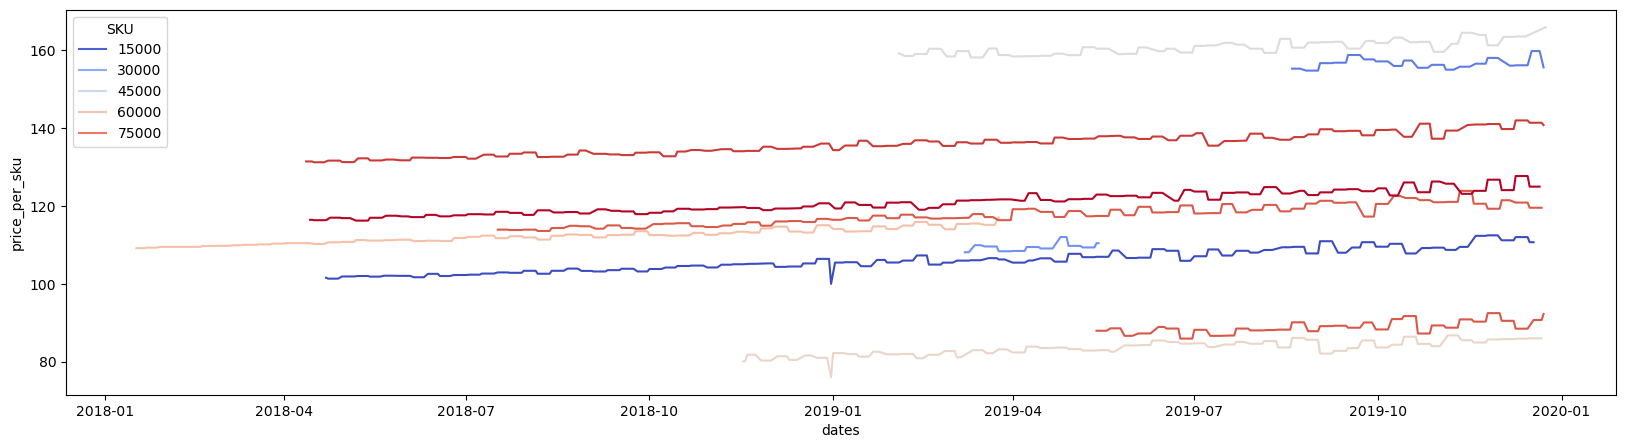

In [84]:
plt.figure(figsize=(20,5))
sns.lineplot(x='dates', y='price_per_sku', data=third, hue='SKU', palette='coolwarm')

2. Для каждого SKU посчитайте количество записей в таблице цен конкурентов. 
Результат сохраните в файл third_sku_competitor_count.csv со столбцами 'SKU', 'conc_rows_count'.

In [85]:
sku_uniq = third.SKU.unique();
conc_sku_uniq = conc.SKU.unique()
set(sku_uniq).difference(set(conc_sku_uniq))

set()

In [86]:
conc.SKU.value_counts()[sku_uniq]

SKU
11050    384
19632    147
24125     93
49661    387
54404    384
60870    105
80308    453
80631    261
84395    399
89272    396
Name: count, dtype: int64

3. Посчитайте количество записей (строк) в моменты, когда цена на SKU была меньше или равна минимальной цене на этот же SKU у конкурентов.<br>
Результат сохраните в файл third_sku_le_price.csv со столбцами 'SKU', 'lowest_price_rows_count'.

In [97]:
aggr_conc = conc.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index(); aggr_conc

,SKU,year,week_num,min,max
0,11050,2019,1,101.25600,126.5700
1,11050,2019,2,103.45370,126.6780
2,11050,2019,3,100.35456,125.4432
3,11050,2019,4,101.91360,105.0984
4,11050,2019,5,101.26848,126.5856
...,...,...,...,...,...
365,89272,2019,47,118.96128,148.7016
366,89272,2019,49,119.13600,136.5100
367,89272,2019,50,122.61696,153.2712
368,89272,2019,51,119.99616,149.9952


In [99]:
third_group = third.merge(aggr_conc, how='left', on=['SKU', 'year', 'week_num']); third_group

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max
0,2018-04-22,11050,101.575,10,2018,17,NaN,NaN
1,2018-04-23,11050,101.344,9,2018,18,NaN,NaN
2,2018-04-25,11050,101.344,9,2018,18,NaN,NaN
3,2018-04-26,11050,101.344,9,2018,18,NaN,NaN
4,2018-04-27,11050,101.344,10,2018,18,NaN,NaN
...,...,...,...,...,...,...,...,...
2776,2019-12-17,89272,124.996,5,2019,51,119.99616,149.9952
2777,2019-12-18,89272,124.996,6,2019,51,119.99616,149.9952
2778,2019-12-19,89272,124.996,5,2019,51,119.99616,149.9952
2779,2019-12-20,89272,124.996,6,2019,51,119.99616,149.9952


In [100]:
third_group['lower_than'] = np.where(third_group.price_per_sku <= third_group['min'], 1,0); third_group

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max,lower_than
0,2018-04-22,11050,101.575,10,2018,17,NaN,NaN,0
1,2018-04-23,11050,101.344,9,2018,18,NaN,NaN,0
2,2018-04-25,11050,101.344,9,2018,18,NaN,NaN,0
3,2018-04-26,11050,101.344,9,2018,18,NaN,NaN,0
4,2018-04-27,11050,101.344,10,2018,18,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2776,2019-12-17,89272,124.996,5,2019,51,119.99616,149.9952,0
2777,2019-12-18,89272,124.996,6,2019,51,119.99616,149.9952,0
2778,2019-12-19,89272,124.996,5,2019,51,119.99616,149.9952,0
2779,2019-12-20,89272,124.996,6,2019,51,119.99616,149.9952,0


In [87]:
third_conc_inner = third.merge(conc, how='inner', on=['SKU', 'year', 'week_num'], suffixes=('', '_conc')); third_conc_inner

,dates,SKU,price_per_sku,num_purchases,year,week_num,ret_net_code,price_per_sku_conc
0,2019-01-02,11050,105.475,9,2019,1,1,102.31075
1,2019-01-02,11050,105.475,9,2019,1,2,116.02250
2,2019-01-02,11050,105.475,9,2019,1,3,116.02250
3,2019-01-02,11050,105.475,9,2019,1,1,103.36550
4,2019-01-02,11050,105.475,9,2019,1,2,105.47500
...,...,...,...,...,...,...,...,...
15031,2019-12-21,89272,124.996,6,2019,51,2,123.74604
15032,2019-12-21,89272,124.996,6,2019,51,3,121.24612
15033,2019-12-21,89272,124.996,6,2019,51,1,122.49608
15034,2019-12-21,89272,124.996,6,2019,51,2,149.99520


In [101]:
third_group.groupby('SKU').lower_than.sum().reset_index()

,SKU,lower_than
0,11050,0
1,19632,0
2,24125,0
3,49661,3
4,54404,13
5,60870,0
6,80308,0
7,80631,0
8,84395,14
9,89272,7


4. Постройте графики изменения цен SKU в группе и цен конкурентов.

In [6]:
test = pd.read_csv(os.path.join(path, 'test.csv'), parse_dates=['dates']); test

,dates,SKU
0,2018-12-17,98255
1,2018-12-21,98255
2,2018-12-22,98255
3,2018-12-23,98255
4,2018-12-24,98255
...,...,...
170,2019-12-31,80631
171,2019-12-31,19632
172,2019-12-31,84395
173,2019-12-31,43678


In [9]:
test.dates.describe()

count                              175
mean     2019-10-23 00:41:08.571428608
min                2018-12-17 00:00:00
25%                2019-10-18 00:00:00
50%                2019-12-25 00:00:00
75%                2019-12-28 00:00:00
max                2019-12-31 00:00:00
Name: dates, dtype: object